## Chess Project

<h1>Table of Contents<span class="tocSkip"></span></h1>


## About the Dataset:


This is a set of just over 20,000 games collected from a selection of users on the site Lichess.org, and how to collect more. I will also upload more games in the future as I collect them. This set contains the:

- Game ID




- Rated (T/F)




- Start Time


- End Time


- Number of Turns


- Game Status


- Winner


- Time Increment


- White Player ID


- White Player Rating


- Black Player ID


- Black Player Rating


- All Moves in Standard Chess Notation


- Opening Eco (Standardised Code for any given opening, list here)


- Opening Name


Opening Ply (Number of moves in the opening phase)
For each of these separate games from Lichess. I collected this data using the Lichess API, which enables collection of any given users game history. The difficult part was collecting usernames to use, however the API also enables dumping of all users in a Lichess team. There are several teams on Lichess with over 1,500 players, so this proved an effective way to get users to collect games from.

# Data Visualization

In [22]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# Importing the dataset

df = pd.read_csv('games.csv')
display(df.tail(3))

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4
20057,N8G2JHGG,True,1.499643e+12,1.499644e+12,78,mate,black,10+0,jamboger,1235,ffbob,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3


In [24]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


None

We notice that we don't have any missing values

In [25]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [107]:
import datetime

df['created_at'] = df.loc[:,'created_at'].apply(lambda x : datetime.datetime.fromtimestamp(x/1000))
df['last_move_at'] = df.loc[:,'last_move_at'].apply(lambda x : datetime.datetime.fromtimestamp(x/1000))
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,2017-08-31 23:06:40.000,2017-08-31 23:06:40.000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,2017-08-31 00:53:20.000,2017-08-31 00:53:20.000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,2017-08-31 00:53:20.000,2017-08-31 00:53:20.000,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,2017-08-30 19:20:00.000,2017-08-30 19:20:00.000,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,2017-08-29 21:06:40.000,2017-08-29 21:06:40.000,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,2017-07-11 19:35:14.342,2017-07-11 19:40:36.076,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,2017-07-10 17:48:09.760,2017-07-10 18:00:33.979,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,2017-07-10 17:44:37.493,2017-07-10 17:47:30.327,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,2017-07-10 17:15:27.019,2017-07-10 17:31:13.718,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [110]:

# Find rows with adjacent equal values
adjacent_equal_mask = (df['created_at'] == df['last_move_at'])

# Drop rows with adjacent equal values
df_cleaned = df.drop(df.index[adjacent_equal_mask], axis=0)
df_cleaned

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
14,u7i6dOaJ,False,2017-08-30 13:46:40.000,2017-08-30 16:33:20.000,31,mate,white,15+15,shivangithegenius,1094,sureka_akshat,1141,e4 e5 Nf3 Nc6 Bc4 Nf6 Nc3 Bc5 O-O O-O d3 Ne8 B...,C50,Four Knights Game: Italian Variation,8
43,oqoT4DLS,False,2017-07-09 17:20:00.000,2017-07-09 20:06:40.000,66,resign,white,40+40,rajuppi,2443,shivangithegenius,978,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 Be3 Bg7 f...,B76,Sicilian Defense: Dragon Variation | Yugoslav...,17
49,iq3Kz06t,False,2017-06-25 17:13:20.000,2017-06-25 20:00:00.000,41,mate,white,40+40,rajuppi,2436,shivangithegenius,978,e4 d5 exd5 Qxd5 Qf3 Qe5+ Ne2 Nf6 d4 Qd5 Qxd5 N...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4
52,KYPdQv8e,False,2017-06-19 19:33:20.000,2017-06-19 22:20:00.000,53,mate,white,10+0,shivangithegenius,978,lucasimeon,1500,d4 f5 e3 Nf6 Nc3 d5 Bb5+ c6 Bd3 b5 Qf3 Qa5 Bxf...,A80,Dutch Defense,2
54,PBS4FEld,True,2017-08-20 12:06:40.000,2017-08-20 14:53:20.000,8,resign,white,16+0,wing175,1521,gerfsh,1162,Nf3 e5 Nxe5 Ke7 e4 Kd6 d4 Nc6,A04,Zukertort Opening: Ross Gambit,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,2017-07-11 19:35:14.342,2017-07-11 19:40:36.076,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,2017-07-10 17:48:09.760,2017-07-10 18:00:33.979,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,2017-07-10 17:44:37.493,2017-07-10 17:47:30.327,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,2017-07-10 17:15:27.019,2017-07-10 17:31:13.718,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [92]:
#We need to convert the dates to a format we could deal with to find the periods of the games.
df_times = df[['created_at','last_move_at']].copy()

df['created_at'] = pd.to_datetime(df_times['created_at']/1000, 
    unit='s', 
    origin='unix')

df['last_move_at'] = pd.to_datetime(df_times['last_move_at']/1000, 
    unit='s', 
    origin='unix')


df.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,2017-08-30 21:53:20,2017-08-30 21:53:20,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,2017-08-30 16:20:00,2017-08-30 16:20:00,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,2017-08-29 18:06:40,2017-08-29 18:06:40,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
5,MsoDV9wj,False,2017-09-01 04:26:40,2017-09-01 04:26:40,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
6,qwU9rasv,True,2017-09-01 01:40:00,2017-09-01 01:40:00,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
7,RVN0N3VK,False,2017-08-25 16:53:20,2017-08-25 16:53:20,9,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
8,dwF3DJHO,True,2017-08-23 17:40:00,2017-08-23 17:40:00,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6
9,afoMwnLg,True,2017-08-22 22:13:20,2017-08-22 22:13:20,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4


In [90]:
df.head(20)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,2017-08-30 21:53:20,2017-08-30 21:53:20,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,2017-08-30 16:20:00,2017-08-30 16:20:00,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,2017-08-29 18:06:40,2017-08-29 18:06:40,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
5,MsoDV9wj,False,2017-09-01 04:26:40,2017-09-01 04:26:40,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
6,qwU9rasv,True,2017-09-01 01:40:00,2017-09-01 01:40:00,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
7,RVN0N3VK,False,2017-08-25 16:53:20,2017-08-25 16:53:20,9,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
8,dwF3DJHO,True,2017-08-23 17:40:00,2017-08-23 17:40:00,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6
9,afoMwnLg,True,2017-08-22 22:13:20,2017-08-22 22:13:20,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4


In [68]:
df.loc[1, "created_at"].strftime("%Y-%m-%d %H:%M:%S.%f")
# .apply(lambda x: x.split())

'2017-08-30 21:53:20.000000'

In [105]:
from datetime import datetime


# String representation of datetime
def calculateMinutes(date1, date2):

    datetime_str1 = date1.strftime("%Y-%m-%d %H:%M:%S.%f")
    datetime_str2 = date2.strftime("%Y-%m-%d %H:%M:%S.%f")

    # Truncate the fractional seconds to 6 digits
    datetime_str1 = datetime_str1[:26]
    datetime_str2 = datetime_str2[:26]

    # Convert the string to a datetime object
    datetime_obj1 = datetime.strptime(datetime_str1, "%Y-%m-%d %H:%M:%S.%f")
    datetime_obj2 = datetime.strptime(datetime_str2, "%Y-%m-%d %H:%M:%S.%f")

    # Calculate the time difference
    time_difference = datetime_obj2 - datetime_obj1

    # Convert the time difference to minutes
    minutes = time_difference.total_seconds() / 60

    return round(minutes, 2)

# Use the method on the dataframe to add a column with game period

# print(calculateMinutes("2017-07-11 22:24:07.779000064","2017-07-11 22:33:56.546000128"))
end = pd.to_datetime(df.loc[20000, "last_move_at"], errors= 'coerce')
start = pd.to_datetime(df.loc[20000, "created_at"], errors= 'coerce')
print(df.loc[2052, "created_at"].strftime("%Y-%m-%d %H:%M:%S.%f"))

print((type(df.loc[20000, "last_move_at"])))
print(calculateMinutes(df.loc[20000, "created_at"],df.loc[20000, "last_move_at"]))

2017-04-03 00:53:20.000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
5.26


In [ ]:
print(calculateMinutes(df.loc[2052, "created_at"].strftime("%Y-%m-%d %H:%M:%S.%f"),df.loc[2052, "last_move_at"].strftime("%Y-%m-%d %H:%M:%S.%f")))

In [77]:
import pandas as pd

# Create two pandas timestamps
timestamp1 = df.loc[2052, "created_at"]
timestamp2 = df.loc[2052, "last_move_at"]

# Calculate the time difference in minutes
time_difference_minutes = (timestamp2 - timestamp1).total_seconds() / 60

print("Time difference in minutes:", time_difference_minutes)


Time difference in minutes: 0.0


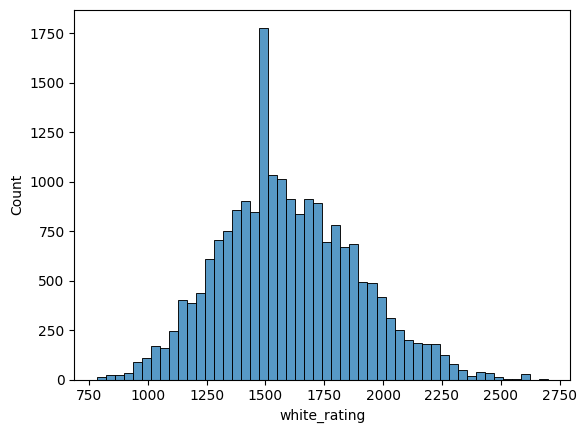

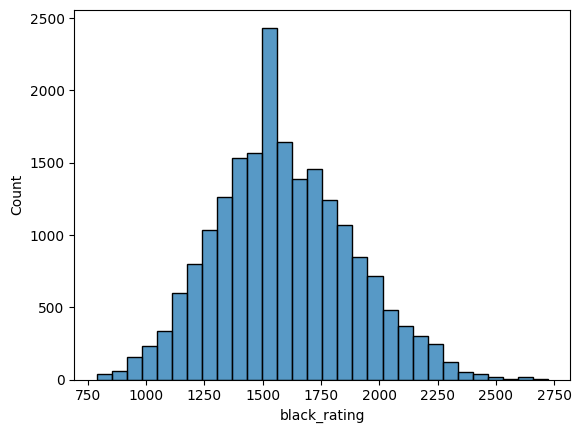

In [58]:
plt.figure()
sns.histplot(x='white_rating', bins= 50 ,data=df);
plt.show()
plt.figure()
sns.histplot(x='black_rating', bins= 30 ,data=df);
plt.show()

# Data Preparation and Preprocessing

In [59]:
# We notice that white_id, black_id and the id columns give no information, so we drop them
df.drop(['id', 'white_id', 'black_id'], axis=1, inplace=True)

In [60]:
# Previewing dataset columns lenghts to see who should be splitted in multiple columns

for col in df.columns:
    print(f"{col} length: {len(df[col].unique())}")

rated length: 2
created_at length: 13151
last_move_at length: 13186
turns length: 211
victory_status length: 4
winner length: 3
increment_code length: 400
white_rating length: 1516
black_rating length: 1521
moves length: 18920
opening_eco length: 365
opening_name length: 1477
opening_ply length: 23


In [61]:
# perform label encoding on boolen column
df['rated'] = df['rated'].astype(int)

# Perform One Hot Encoding on categorical columns with less than 5 unique values
df = pd.get_dummies(df, columns=['victory_status', 'winner'],drop_first=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   rated                     20058 non-null  int32         
 1   created_at                20058 non-null  datetime64[ns]
 2   last_move_at              20058 non-null  datetime64[ns]
 3   turns                     20058 non-null  int64         
 4   increment_code            20058 non-null  object        
 5   white_rating              20058 non-null  int64         
 6   black_rating              20058 non-null  int64         
 7   moves                     20058 non-null  object        
 8   opening_eco               20058 non-null  object        
 9   opening_name              20058 non-null  object        
 10  opening_ply               20058 non-null  int64         
 11  victory_status_draw       20058 non-null  bool          
 12  victory_status_mat

In [62]:

# Convert new colmuns  from uint8 to int
df.loc[:, ['victory_status_draw', 'victory_status_mate',
       'victory_status_outoftime', 'victory_status_resign', 'winner_black',
       'winner_draw', 'winner_white']] = df.loc[:, ['victory_status_draw', 'victory_status_mate',
       'victory_status_outoftime', 'victory_status_resign', 'winner_black',
       'winner_draw', 'winner_white']].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   rated                     20058 non-null  int32         
 1   created_at                20058 non-null  datetime64[ns]
 2   last_move_at              20058 non-null  datetime64[ns]
 3   turns                     20058 non-null  int64         
 4   increment_code            20058 non-null  object        
 5   white_rating              20058 non-null  int64         
 6   black_rating              20058 non-null  int64         
 7   moves                     20058 non-null  object        
 8   opening_eco               20058 non-null  object        
 9   opening_name              20058 non-null  object        
 10  opening_ply               20058 non-null  int64         
 11  victory_status_draw       20058 non-null  int32         
 12  victory_status_mat

In [63]:
# Previewing the moves stats to get a sense of the data
df['moves'].apply(lambda x: len(x.split(' '))).describe()

count    20058.000000
mean        60.465999
std         33.570585
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: moves, dtype: float64

In [64]:
# Now we are going to add a new column with the number of moves in each game
df['moves_num'] = df['moves'].apply(lambda x: len(x.split(' ')))

In [65]:
# The max number of moves in proffinal chess is less than 150, so we drop all outliers games
Q1 = df['moves_num'].quantile(q=0.25) 
Q3 = df['moves_num'].quantile(q=0.75)

IQR = Q3 - Q1

df.drop(df[df['moves_num'] >= Q3 + 1.5*IQR].index, inplace=True)

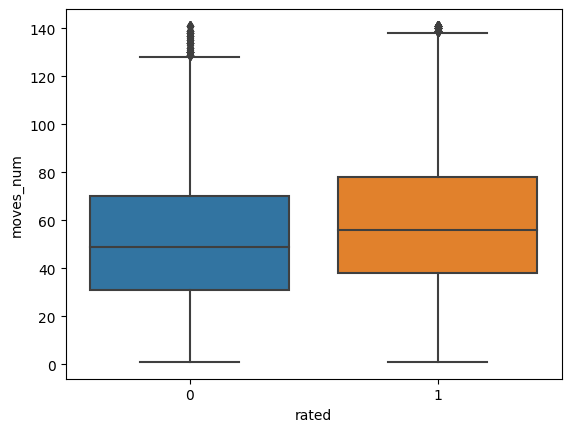

In [66]:
plt.figure()
sns.boxplot(y='moves_num',x='rated',data=df);
plt.show()

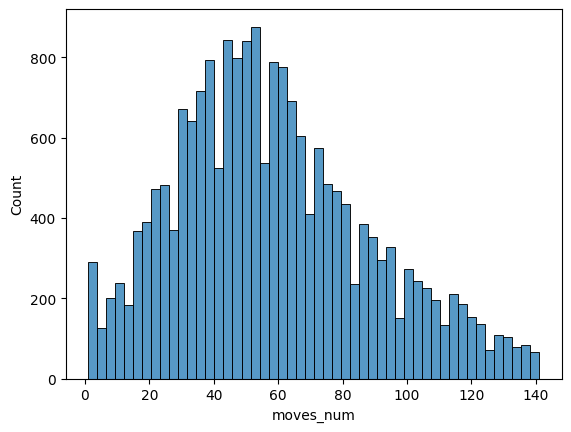

In [67]:

plt.figure()
sns.histplot(x='moves_num', bins= 50 ,data=df);
plt.show()

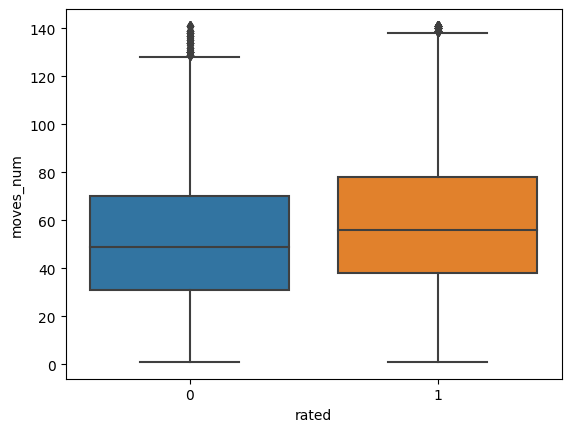

In [68]:
# Ploting box plot after deleting outliers
plt.figure()
sns.boxplot(y='moves_num',x='rated',data=df);
plt.show()

In [69]:
# We notice that still  there are some noisy in the data especially the lower wisker of the boxplot (there are many games with 1 moves)
# In chess the minimum number of moves to win a game is 2 moves (Fool's mate) so we will remove all the games with less than 2 moves

OneMove_games = df.drop(df[df['moves_num'] < 2].index, inplace=True)

In [70]:
# We are going to create a new column called period which is the difference between the last move and the creation of the account
df['period'] = df['last_move_at'] - df['created_at']
df['period'].describe() 

count                        19589
mean     0 days 00:14:16.176105465
std      0 days 01:20:56.433150080
min                0 days 00:00:00
25%                0 days 00:00:00
50%      0 days 00:03:53.640999680
75%      0 days 00:12:58.663999744
max      7 days 00:17:24.700999936
Name: period, dtype: object

In [71]:
# Ploting box plot for period
plt.figure()
sns.boxplot(y = 'period', x = 'rated', data = df)
plt.show()

KeyboardInterrupt: 

In [ ]:
# Drop the 'created_at' and 'last_move_at' columns because they are not useful for our analysis and they are given in the wrong format.
times_columns = df.drop(['created_at', 'last_move_at', 'period'], axis=1, inplace=True)

In [ ]:
# The increment_code columns represents ..., so we convert it to a better format by taking the number before the + sign
df['increment_code'] = df['increment_code'].str.split('+').str[0].astype(int)

In [ ]:
# Previewing dataset after cleaning so far
display(df.head())
display(df.info())
display(df.describe())

,rated,turns,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,winner_black,winner_draw,winner_white,moves_num
0,0,13,15,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0,0,1,0,0,0,1,13
1,1,16,5,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,0,0,0,1,1,0,0,16
2,1,61,5,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,0,1,0,0,0,0,1,61
3,1,61,20,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,0,1,0,0,0,0,1,61
4,1,95,30,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,0,1,0,0,0,0,1,95


<class 'pandas.core.frame.DataFrame'>
Index: 19589 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   rated                     19589 non-null  int32 
 1   turns                     19589 non-null  int64 
 2   increment_code            19589 non-null  int32 
 3   white_rating              19589 non-null  int64 
 4   black_rating              19589 non-null  int64 
 5   moves                     19589 non-null  object
 6   opening_eco               19589 non-null  object
 7   opening_name              19589 non-null  object
 8   opening_ply               19589 non-null  int64 
 9   victory_status_draw       19589 non-null  int32 
 10  victory_status_mate       19589 non-null  int32 
 11  victory_status_outoftime  19589 non-null  int32 
 12  victory_status_resign     19589 non-null  int32 
 13  winner_black              19589 non-null  int32 
 14  winner_draw               1

None

,rated,turns,increment_code,white_rating,black_rating,opening_ply,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,winner_black,winner_draw,winner_white,moves_num
count,19589.000000,19589.000000,19589.000000,19589.000000,19589.000000,19589.000000,19589.000000,19589.000000,19589.000000,19589.000000,19589.000000,19589.000000,19589.000000,19589.000000
mean,0.804380,58.205779,13.860023,1593.972331,1586.193476,4.814335,0.042422,0.312778,0.081168,0.563633,0.454898,0.043800,0.501302,58.205779
std,0.396687,30.030278,17.292440,290.445498,290.920346,2.794085,0.201555,0.463636,0.273100,0.495947,0.497974,0.204655,0.500011,30.030278
min,0.000000,2.000000,0.000000,784.000000,789.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,37.000000,10.000000,1395.000000,1389.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000
50%,1.000000,54.000000,10.000000,1564.000000,1559.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,54.000000
75%,1.000000,77.000000,15.000000,1788.000000,1780.000000,6.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,77.000000
max,1.000000,141.000000,180.000000,2700.000000,2621.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,141.000000


In [ ]:
# Normalizing numerical columns in the dataset
from sklearn.preprocessing import normalize

num_columns = df.select_dtypes(exclude=['object']).columns

df[num_columns] = normalize(df[num_columns])